<a href="https://colab.research.google.com/github/HENILCHOPRA/AutoEncoders/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd

In [ ]:
x = torch.tensor(3., requires_grad= True)
x

tensor(3., requires_grad=True)

In [ ]:
y = torch.tensor(2., requires_grad= True)
y

tensor(2., requires_grad=True)

In [ ]:
y.grad

In [ ]:
w = x * y + y
x.grad

In [ ]:
arr = np.array([[1,2],[3,4.]])

In [ ]:
z = torch.from_numpy(arr)

<h2>Regression model</h2>

In [ ]:
inputs = np.array(
    [[73,67,43],
     [91,88,64],
     [87,134,58],
     [102,43,37],
     [69,96,70]], dtype = 'float32'
)
inputs = torch.from_numpy(inputs)

In [ ]:
targets = np.array(
    [[56,70],
     [81,101],
     [119,133],
     [22,37],
     [103,119]], dtype = 'float32'
)
targets = torch.from_numpy(targets)

In [ ]:
w = torch.randn(2,3, requires_grad= True)
b = torch.randn(2, requires_grad = True)

print(w)
print(b)

tensor([[ 1.7645,  0.7065,  0.2973],
        [-0.4572, -1.3117,  0.4612]], requires_grad=True)
tensor([1.1350, 0.2044], requires_grad=True)


"@" represents matrix *multiplications*

In [ ]:
def model(x):
  return x @ w.t() + b

In [ ]:
predicts = model(inputs)
print(predicts)

tensor([[ 190.0653, -101.2284],
        [ 242.9068, -127.3198],
        [ 266.5655, -188.5982],
        [ 222.4955,  -85.7734],
        [ 211.5238, -124.9875]], grad_fn=<AddBackward0>)


<h2> Loss function </h2>

In [ ]:
targets - predicts

tensor([[-134.0653,  171.2284],
        [-161.9068,  228.3198],
        [-147.5655,  321.5982],
        [-200.4955,  122.7734],
        [-108.5238,  243.9875]], grad_fn=<SubBackward0>)

*tensor.numel() number of elements in the tensor*

In [ ]:
def mse(t1, t2):
  diff = t1 - t2
  return torch.sum(diff ** 2) / diff.numel() 

In [ ]:
loss = mse(targets, predicts)
print(loss)

tensor(37741.6484, grad_fn=<DivBackward0>)


<h2>Gradients</h2>


 **.*backward()***  computes gradients for tensors with ***requires_grad = True***

In [ ]:
loss.backward() 

In [ ]:
print(w.grad)
print(b.grad)

tensor([[ 13059.4346,  12408.7080,   7940.1284],
        [-18122.7695, -20672.1328, -12449.9453]])
tensor([ 150.5114, -217.5815])


In [ ]:
w.grad.zero_()
b.grad.zero_()

tensor([0., 0.])

<h2>Binding it all</h2>

In [ ]:
print(w)
print(b)

tensor([[ 1.6339,  0.5824,  0.2179],
        [-0.2760, -1.1050,  0.5857]], requires_grad=True)
tensor([1.1335, 0.2066], requires_grad=True)


In [ ]:
for i in range(100):
  preds = model(inputs)
  loss = mse(preds, targets)
  loss.backward() 
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

print(loss) 


tensor(3.0098, grad_fn=<DivBackward0>)


***USING PYTORCH***

In [ ]:
import torch.nn as nn
inputs = np.array(
    [[73,67,43],
     [91,88,64],
     [87,134,58],
     [102,43,37],
     [69,96,70],
     [73,67,43],
     [91,88,64],
     [87,134,58],
     [102,43,37],
     [69,96,70],
     [73,67,43],
     [91,88,64],
     [87,134,58],
     [102,43,37],
     [69,96,70]], dtype = 'float32'
)
targets = np.array(
    [[56,70],
     [81,101],
     [119,133],
     [22,37],
     [103,119],
     [56,70],
     [81,101],
     [119,133],
     [22,37],
     [103,119],
     [56,70],
     [81,101],
     [119,133],
     [22,37],
     [103,119]], dtype = 'float32'
)
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F


In [ ]:
trainds = TensorDataset(inputs, targets)
trainds[:2]

(tensor([[73., 67., 43.],
         [91., 88., 64.]]), tensor([[ 56.,  70.],
         [ 81., 101.]]))

In [ ]:
batch_size = 5
traindl = DataLoader(trainds, batch_size, shuffle = True)

In [ ]:
for xb, yb in traindl:
  print(xb,yb)
  break

tensor([[ 69.,  96.,  70.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 91.,  88.,  64.],
        [ 91.,  88.,  64.]]) tensor([[103., 119.],
        [119., 133.],
        [ 22.,  37.],
        [ 81., 101.],
        [ 81., 101.]])


In [ ]:
model = nn.Linear(3,2) # 3 is size of input and 2 is size of output

print(model.weight)
print(model.bias)


Parameter containing:
tensor([[ 0.5046, -0.5365, -0.4938],
        [ 0.0522,  0.2542, -0.0322]], requires_grad=True)
Parameter containing:
tensor([ 0.0372, -0.5246], requires_grad=True)


In [ ]:
list(model.parameters()) 
# give out all the parameters of the model
# Here it is weights and bias 


[Parameter containing:
 tensor([[ 0.5046, -0.5365, -0.4938],
         [ 0.0522,  0.2542, -0.0322]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0372, -0.5246], requires_grad=True)]

In [ ]:
def fit(model, epochs, loss_fn, opt):
  for epoch in range(epochs):
    for xb,yb in traindl:
      pred = model(xb)
      
      loss = loss_fn(pred, yb)

      loss.backward()

      opt.step()
      
      opt.zero_grad()

    # if epoch%10 ==0 :
    print(epoch,': ', loss.item())

In [ ]:
model = nn.Linear(3,2)
loss_fn = F.mse_loss
opt = torch.optim.SGD(model.parameters(), lr = 1e-5)
fit(model, 100, loss_fn, opt)

0 :  6108.3251953125
10 :  202.900146484375
20 :  153.0011444091797
30 :  107.14607238769531
40 :  84.56195831298828
50 :  44.398963928222656
60 :  28.98651695251465
70 :  24.339397430419922
80 :  37.756431579589844
90 :  9.665559768676758


In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("/content/housing.csv", header=None, delimiter=r"\s+",  names = column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
inputs = df.drop(['MEDV'], axis = 1)
targets = df['MEDV']
inputs = torch.from_numpy(inputs.to_numpy(dtype = 'float32'))
targets = torch.from_numpy(targets.to_numpy(dtype = 'float32'))

In [ ]:
trainds = TensorDataset(inputs, targets)
batch_size = 253
traindl = DataLoader(trainds, batch_size, shuffle = True)

model = nn.Linear(13, 1)
loss_fn = F.mse_loss
opt = torch.optim.SGD(model.parameters(), lr = 1e-5)
fit(model, 10, loss_fn, opt)

0 :  60019.53125
1 :  47667184.0
2 :  35618791424.0
3 :  28076614352896.0
4 :  2.023204474322944e+16
5 :  1.6025913038951416e+19
6 :  1.226305971684989e+22
7 :  9.280503909094064e+24
8 :  7.27497262057502e+27
9 :  5.558147072390752e+30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Using a target size (torch.Size([253])) that is different to the input size (torch.Size([253, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  


***<h1> Image Classification</h1>***

In [ ]:
import torch
import torchvision
from torchvision.transforms import transforms
from torchvision.datasets import MNIST
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_dataset = MNIST(root = '/content/', download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
len(train_dataset)

60000

In [ ]:
test_dataset = MNIST(root = '/content/', train = False)

5


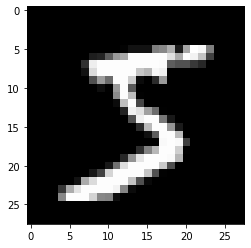

In [ ]:
img, label = train_dataset[0]
plt.imshow(img, cmap = 'gray')
print(label)

*transformation*

In [ ]:
train_data = MNIST(root = '/content/',
                   train = True,
                   transform = transforms.ToTensor())

In [ ]:
test_data = MNIST(root = '/content/',
                   train = False,
                   transform = transforms.ToTensor())

In [ ]:
img_tensor, label = train_data[0]

In [ ]:
type(img_tensor)

torch.Tensor

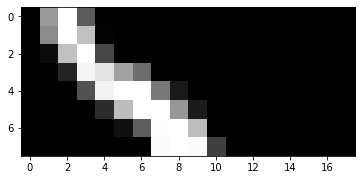

In [ ]:
plt.imshow(img_tensor[0, 10:18,10:28], cmap = 'gray')

In [ ]:
import numpy as np
def split_indices(n,val_pct):
  n_val = int(n * val_pct)
  idxs = np.random.permutation(n)
  return idxs[n_val:], idxs[:n_val]

In [ ]:
train_indices, val_indices = split_indices(len(train_dataset), val_pct = 0.2)

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(train_data, batch_size, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(train_data, batch_size, sampler = val_sampler)


In [ ]:
import  torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [ ]:
for images, labels in train_loader:
  print(labels)
  print(images)
  output = model(images)
  break

In [ ]:
class mnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out
model = mnistModel()

In [ ]:
model.linear.bias 
model.linear.weight

Parameter containing:
tensor([[-0.0031,  0.0234, -0.0037,  ..., -0.0351,  0.0217,  0.0205],
        [ 0.0307, -0.0088, -0.0133,  ..., -0.0197,  0.0103,  0.0095],
        [ 0.0342,  0.0090,  0.0323,  ..., -0.0141, -0.0180, -0.0250],
        ...,
        [ 0.0152,  0.0152,  0.0065,  ...,  0.0212, -0.0206,  0.0078],
        [ 0.0236, -0.0351, -0.0179,  ...,  0.0264, -0.0197, -0.0113],
        [ 0.0327, -0.0352,  0.0143,  ..., -0.0332,  0.0152,  0.0338]],
       requires_grad=True)

In [ ]:
for images, labels in train_loader:
  outputs = model(images)
  break
print(outputs.shape)
outputs[:2].data 

torch.Size([100, 10])


tensor([[ 0.0408,  0.3293,  0.0510,  0.0703, -0.0215,  0.0168, -0.0418,  0.2313,
          0.2350, -0.1168],
        [ 0.0723, -0.0294,  0.1402, -0.2665,  0.3851,  0.0611, -0.2986,  0.1312,
          0.0209, -0.0717]])

In [ ]:
import torch.nn.functional as F

In [ ]:
probs = F.softmax(outputs, dim = 1) 
# converts outputs to probablities
print(probs[0])

tensor([0.0953, 0.1272, 0.0963, 0.0982, 0.0896, 0.0931, 0.0878, 0.1153, 0.1158,
        0.0814], grad_fn=<SelectBackward0>)


In [ ]:
max_probs, preds = torch.max(probs, dim = 1)
# get maximum probablity and its index from every prediction output
preds

tensor([1, 4, 2, 8, 2, 8, 2, 2, 2, 3, 2, 2, 8, 7, 5, 2, 2, 8, 5, 8, 1, 2, 1, 4,
        4, 4, 8, 8, 4, 2, 4, 2, 2, 8, 8, 2, 8, 4, 2, 0, 5, 4, 3, 4, 2, 2, 8, 7,
        5, 8, 2, 4, 8, 4, 8, 2, 4, 2, 2, 2, 4, 8, 4, 8, 4, 0, 7, 4, 4, 0, 4, 8,
        8, 7, 3, 2, 8, 5, 0, 8, 2, 4, 2, 5, 2, 0, 3, 7, 2, 8, 8, 8, 8, 8, 2, 5,
        5, 4, 4, 2])

In [ ]:
labels
#ground Truth

tensor([4, 1, 3, 3, 1, 7, 2, 0, 5, 1, 1, 1, 5, 0, 6, 8, 6, 9, 5, 3, 6, 8, 4, 1,
        3, 9, 9, 8, 7, 9, 1, 1, 5, 7, 3, 5, 3, 4, 2, 3, 8, 9, 1, 5, 8, 3, 0, 6,
        2, 7, 0, 4, 7, 7, 8, 1, 3, 7, 0, 5, 4, 8, 9, 7, 4, 5, 1, 4, 3, 6, 9, 8,
        8, 0, 1, 5, 7, 2, 1, 7, 1, 8, 0, 2, 2, 5, 5, 6, 0, 7, 9, 8, 2, 9, 0, 7,
        3, 4, 7, 5])

*Evaluation metric*

In [ ]:
def acc(l1, l2):
  return torch.sum(l1 == l2).item() / l1.numel()

In [ ]:
acc(preds, labels)

0.16

In [ ]:
lr = 0.001
opt = torch.optim.ASGD(model.parameters(), lr = lr)
loss_fn = F.cross_entropy
#Does softmax internally so can directly give output of last layer

loss_fn(outputs, labels)

tensor(2.3081, grad_fn=<NllLossBackward0>)

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None):
  preds = model(xb)
  loss = loss_func(preds, yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [ ]:
def evaluate(model, loss_fn, valid_dl, metric = None):
  with torch.no_grad():
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb,yb in valid_dl]

    losses, nums, metirc_result = zip(*results)

    total = np.sum(nums)

    avg_loss = np.sum(np.multiply(losses, nums)) / total

    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(metirc_result, nums)) / total

    return avg_loss, total, avg_metric

In [ ]:
def acc(l1, l2):
  _, preds = torch.max(l1, dim = 1)
  return torch.sum(preds == l2).item() / preds.numel()

In [ ]:
evaluate(model, loss_fn, val_loader, metric = acc)

(2.329698973894119, 12000, 0.11066666666666666)

In [ ]:
def fit(epochs, model, loss_fn, opt, train_dl, val_dl, metric = None):

  for epoch in range(epochs):
    for xb, yb, in train_dl:
      loss,_ ,_ = loss_batch(model, loss_fn, xb,yb, opt)

    val_loss, total, metric_result  = evaluate(model, loss_fn, val_dl, metric)

    if metric is not None:
      print(epoch, ' : ', val_loss, metric_result)


In [ ]:
model = mnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

In [ ]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, acc)

0  :  2.2831616342067718 0.10225
1  :  2.2319568753242494 0.16933333333333334
2  :  2.1833391229311627 0.278
3  :  2.136960345506668 0.37525
4  :  2.0925724764664966 0.451


In [ ]:
torch.save(model.state_dict(), '/content/mnist.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0279, -0.0170,  0.0096,  ..., -0.0024, -0.0098,  0.0245],
                      [ 0.0007, -0.0128, -0.0210,  ..., -0.0041,  0.0012, -0.0333],
                      [-0.0185,  0.0005, -0.0069,  ..., -0.0256,  0.0045,  0.0176],
                      ...,
                      [-0.0219, -0.0073,  0.0260,  ..., -0.0303,  0.0031, -0.0205],
                      [-0.0151,  0.0014, -0.0067,  ...,  0.0159, -0.0057, -0.0022],
                      [-0.0077,  0.0165,  0.0106,  ..., -0.0177,  0.0346, -0.0207]])),
             ('linear.bias',
              tensor([-0.0271, -0.0307, -0.0054,  0.0131, -0.0005, -0.0250,  0.0257,  0.0238,
                       0.0212,  0.0181]))])

In [ ]:
model2 = mnistModel()
model2.load_state_dict(torch.load('/content/mnist.pth'))


<All keys matched successfully>

In [ ]:
evaluate(model2, loss_fn, val_loader, metric= acc)

(2.0925724665323893, 12000, 0.451)

# GPU training

In [ ]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

import torch.nn.functional as F
import torch.nn as nn

In [ ]:
dataset = MNIST(root = '/content',
                download = True,
                transform = ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
def split_indices(n, val_percent):
  n_val = int(n * val_percent)

  idxs = np.random.permutation(n)
  return idxs[n_val:], idxs[:n_val]

In [ ]:
train_idx,val_idx = split_indices(len(dataset), 0.3)
len(train_idx),len(val_idx)

(42000, 18000)

In [ ]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_idx)
train_dl = DataLoader(dataset,
                      batch_size,
                      sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_idx)
val_dl = DataLoader(dataset,
                      batch_size,
                      sampler = train_sampler)

In [ ]:
class MnistModel(nn.Module):
  def __init__(self, in_size, hidden_size, out_size):
    super().__init__()
    self.linear = nn.Linear(in_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size,out_size)

  def forward(self, xb):
    xb = xb.view(xb.size(0), -1) #view() uses same block of memory
    out = self.linear(xb)
    out = F.relu(out)

    out = self.linear2(out)
    return out

In [ ]:
input_size = 784
num_classes = 10

model = MnistModel(input_size, hidden_size = 64, out_size = num_classes)

In [ ]:
for layer in model.parameters():
  print(layer.shape)

torch.Size([64, 784])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


In [ ]:
for images, labels in train_dl:
  outputs = model(images)
  loss = F.cross_entropy(outputs, labels)
  print(loss.item())
  break

F.softmax(outputs)[:10]

2.297187089920044


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys


tensor([[0.0951, 0.1318, 0.0981, 0.1128, 0.0904, 0.0840, 0.0828, 0.0782, 0.0991,
         0.1276],
        [0.0870, 0.1118, 0.1088, 0.1078, 0.0886, 0.0958, 0.0808, 0.0929, 0.1106,
         0.1159],
        [0.0895, 0.1148, 0.1189, 0.1042, 0.0918, 0.0961, 0.0815, 0.0899, 0.1047,
         0.1087],
        [0.0906, 0.1118, 0.1154, 0.1139, 0.0931, 0.0950, 0.0820, 0.0853, 0.1028,
         0.1100],
        [0.0992, 0.1108, 0.1119, 0.1059, 0.0965, 0.0983, 0.0848, 0.0871, 0.1028,
         0.1028],
        [0.0986, 0.1080, 0.1035, 0.1097, 0.0966, 0.0922, 0.0827, 0.0928, 0.1063,
         0.1095],
        [0.0932, 0.1117, 0.1152, 0.1056, 0.0992, 0.0889, 0.0846, 0.0866, 0.1054,
         0.1097],
        [0.0890, 0.0983, 0.1004, 0.1132, 0.0943, 0.0966, 0.0811, 0.0939, 0.1126,
         0.1207],
        [0.0890, 0.1153, 0.1145, 0.0994, 0.0973, 0.0908, 0.0838, 0.0919, 0.1042,
         0.1139],
        [0.0995, 0.1058, 0.1045, 0.1131, 0.0916, 0.0888, 0.0814, 0.0930, 0.1091,
         0.1131]], grad_fn=<

*Use GPU*

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.device('cuda') #use GPU 

device(type='cuda')

In [ ]:
from numpy.lib.arraysetops import isin
device = torch.device('cuda')

def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  else:
    return data.to(device, non_blocking = True)

class DeviceDataLoader():
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)
  def __len__(self):
    return len(self.dl)

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None): # train_batch function
  preds = model(xb)

  loss = loss_func(preds, yb)

  if opt is not None:
    loss.backward()

    opt.step()

    opt.zero_grad()

  metric_result = None

  if metric is not None:
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

def evaluate(model, loss_fn, val_dl, metric = None):
  with torch.no_grad():
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb, yb in val_dl]

  losses, nums, metrics = zip(*results)
  total = np.sum(nums)

  avg_loss = np.sum(np.multiply(losses, nums)) / total
  avg_metric = None
  if metric is not None:
    avg_metric = np.sum(np.multiply(metrics, nums)) / total

  return avg_loss, total, avg_metric


In [ ]:
from re import L

def fit(epochs, lr, model, loss_fn, train_dl, val_dl, metric = None, opt_fn = None):
  losses, metrics = [], []
  if opt_fn is None:opt_fn = torch.optim.SGD
  opt = torch.optim.SGD(model.parameters(), lr = lr)
  
  # result = evaluate(model, loss_fn, val_dl, metric)

  for epoch in range(epochs):

    for xb, yb in train_dl:
      loss_batch(model, loss_fn, xb, yb, opt)

    val_loss, total, val_metric = evaluate(model, loss_fn, val_dl, metric)

    losses.append(val_loss)
    metrics.append(val_metric)
    if metric is None:
      print(epoch, " : ", val_loss)

    else:
      print(epoch, " : ", val_loss," \nmetric: ", val_metric)
  return losses, metrics

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.sum(preds == labels).item() / len(preds)

In [ ]:
model = MnistModel(input_size, hidden_size = 128, out_size = num_classes)
to_device(model, device)        
val_dl = DeviceDataLoader(val_dl, device)
train_dl = DeviceDataLoader(train_dl, device)

In [ ]:
val_loss, total, val_acc = evaluate(model, F.cross_entropy, val_dl, metric = accuracy)
val_loss, val_acc

In [ ]:
fit(5, 0.1, model, F.cross_entropy, train_dl, val_dl, metric = accuracy)

In [ ]:
exit

# CNN/ ResNet

In [ ]:
import os
import torch
import tarfile
from torchvision.datasets.utils import download_url

from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

import torch.nn.functional as F
import torch.nn as nn

In [ ]:
# dataset_url = "http://files.fast.ai/data/cifar10.tgz"
# download_url(dataset_url, '/content/')

In [ ]:
with tarfile.open("/content/cifar10.tgz") as tar:
  tar.extractall(path = "/content/")

In [ ]:
data_dir = "/content/cifar10"
classes = os.listdir(data_dir + '/train')
classes

['deer',
 'horse',
 'truck',
 'airplane',
 'frog',
 'dog',
 'cat',
 'ship',
 'automobile',
 'bird']

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
dataset = ImageFolder(data_dir + '/train', transform = ToTensor())

In [ ]:
img, label = dataset[0]
print(img.shape, label)

torch.Size([3, 32, 32]) 0


In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
import matplotlib.pyplot as plt

def show_example(img, label):
  print('label: ', dataset.classes[label])

  plt.imshow(img.permute([1,2,0]))

In [ ]:
# show_example(*dataset[10000])

In [ ]:
import numpy as np

def split_idx(n, val_percent):
  n_val = int(n * val_percent)
  idxs = np.random.permutation(n)
  return idxs[n_val:], idxs[:n_val]

val_pct = 0.3
train_idx, val_idx = split_idx(len(dataset), val_pct)


In [ ]:
batch_size = 100
train_sampler = SubsetRandomSampler(train_idx)
train_dl = DataLoader(dataset,
                      batch_size= batch_size,
                      sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_idx)
val_dl = DataLoader(dataset,
                      batch_size= batch_size,
                      sampler = val_sampler)

In [ ]:
for x, y in val_dl:
  print(x.shape, y.shape)
  break

In [ ]:
simple_model = nn.Sequential(
    nn.Conv2d(3,8, kernel_size = 3, stride = 1, padding = 1), 
    #nn.Conv2d(input_channels, output_channels: number of filters)
    nn.MaxPool2d(2,2)
)
for images, labels in train_dl:
  print(images.shape)
  out = simple_model(images)
  print(out.shape)
  break

In [ ]:
# model = nn.Sequential(
#     nn.Conv2d(3,16, kernel_size = 3, stride = 1, padding = 1),
#     nn.ReLU(),
#     nn.MaxPool2d((2,2)), #output: bs x 16 x 16 x 16

#     nn.Conv2d(16,16, kernel_size = 3, stride = 1, padding = 1),
#     nn.ReLU(),
#     nn.MaxPool2d((2,2)), #output: bs x 16 x 8 x 8

#     nn.Conv2d(16,16, kernel_size = 3, stride = 1, padding = 1),
#     nn.ReLU(),
#     nn.MaxPool2d((2,2)), #output: bs x 16 x 4 x 4

#     nn.Conv2d(16,16, kernel_size = 3, stride = 1, padding = 1),
#     nn.ReLU(),
#     nn.MaxPool2d((2,2)), #output: bs x 16 x 2 x 2

#     nn.Conv2d(16,16, kernel_size = 3, stride = 1, padding = 1),
#     nn.ReLU(),
#     nn.MaxPool2d((2,2)), #output: bs x 16 x 1 x 1

#     nn.Flatten(), #output: bs x 16
#     nn.Linear(16,10)  #output: bs x 10
# )

model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))

In [ ]:
model[3].weight.shape

In [ ]:
for images, labels in train_dl:
  print(images.shape)
  out = model(images)
  print(out.shape)
  break

In [ ]:
probs = F.softmax(out, dim = 1)
max_values, max_indxs = torch.max(probs, dim = 1)

In [ ]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]

  else:
    return data.to(device, non_blocking = True)

class DeviceDataLoader():
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    return len(self.dl)

In [ ]:
device = get_default_device()
device

In [ ]:
model = to_device(model, device)
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [ ]:
model

In [ ]:
# def loss_batch(model, loss_fn, xb, yb, opt = None, metric = None):
#   preds = model(xb)
#   loss = loss_fn(preds, yb)

#   if opt is not None:
#     loss.backward()
#     opt.step()
#     opt.zero_grad()

#   metric_result = None
#   if metric is not None:
#     metric_result = metric(preds, yb)

#   return loss.item(), len(xb), metric_result

# def evaluate(model, loss_fn, val_dl, metric = None):
#   with torch.no_grad():
#     results = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb, yb in val_dl]

#   losses, num, metrics = zip(*results)
#   total = np.sum(num)

#   avg_loss = np.sum(np.multiply(losses, num)/total)
#   avg_metric = None
#   if metric is not None:
#     avg_metric = np.sum(np.multiply(metrics, num)) / total

#   return avg_loss, total, avg_metric


def loss_batch(model, loss_func, xb, yb, opt = None, metric = None): # train_batch function
  preds = model(xb)

  loss = loss_func(preds, yb)

  if opt is not None:
    loss.backward()

    opt.step()

    opt.zero_grad()

  metric_result = None
  if metric is not None:
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

def evaluate(model, loss_fn, val_dl, metric = None):
  with torch.no_grad():
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb, yb in val_dl]

  losses, nums, metrics = zip(*results)
  total = np.sum(nums)

  avg_loss = np.sum(np.multiply(losses, nums)) / total
  avg_metric = None
  if metric is not None:
    avg_metric = np.sum(np.multiply(metrics, nums)) / total

  return avg_loss, total, avg_metric

In [ ]:
def fit(epochs, model, loss_fn, train_dl, val_dl,
        opt = None, lr = None, metric = None):
  train_losses, val_losses, val_metrics = [], [], []
  
  if opt is None: opt = torch.optim.SGD
  opt = opt(model.parameters(), lr = lr)

  for epoch in range(epochs):
    # model.train() ##############################################
    for xb, yb in train_dl:
      train_loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)
    # model.eval()
    val_loss, total, val_metric = evaluate(model, loss_fn, val_dl, metric)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_metrics.append(val_metric)

    if metric is None:
      print(f'Epoch [{epoch}/{epochs}], train_loss: {train_loss}, val_loss: {val_loss}')
    else:
          print(f'Epoch [{epoch}/{epochs}], train_loss: {train_loss}, val_loss: {val_loss}, metric:{val_metric}')

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.sum(preds == labels).item() / len(preds)

In [ ]:
evaluate(model, F.cross_entropy, val_dl, metric = accuracy)

In [ ]:
fit(5, model, F.cross_entropy, train_dl, val_dl,
        opt = torch.optim.SGD, lr = 0.01, metric = accuracy)

# Data Augmentations and Regularizations


*RNN*

In [ ]:
import os
import torch
import tarfile
from torchvision.datasets.utils import download_url

from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

import torch.nn.functional as F
import torch.nn as nn

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

import torchvision.transforms as tt

In [ ]:
# dataset_url = "http://files.fast.ai/data/cifar10.tgz"
# download_url(dataset_url, '/content/')

In [ ]:
with tarfile.open("/content/cifar10.tgz") as tar:
  tar.extractall(path = "/content/")

In [ ]:
data_dir = "/content/cifar10"
classes = os.listdir(data_dir + '/train')
classes

['deer',
 'horse',
 'truck',
 'airplane',
 'frog',
 'dog',
 'cat',
 'ship',
 'automobile',
 'bird']

In [ ]:
import matplotlib.pyplot as plt

def show_example(img, label):
  print('label: ', dataset.classes[label])

  plt.imshow(img.permute([1,2,0]))

In [ ]:
# show_example(*dataset[10000])

In [ ]:
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) 
# only for current dataset. Mean and Standard deviation of images for normalization 
train_tfms = tt.Compose([tt.RandomCrop(32, padding = 4, padding_mode = 'reflect'),
                        tt.RandomHorizontalFlip(),
                        tt.ToTensor(),
                        tt.Normalize(*stats)])
val_tfms = tt.Compose([tt.ToTensor(),tt.Normalize(*stats)])


In [ ]:
dataset_train = ImageFolder(data_dir + '/train', transform = train_tfms)
dataset_test = ImageFolder(data_dir + '/test', transform = val_tfms)

In [ ]:
batch_size = 256

train_dl = DataLoader(dataset_train, batch_size, shuffle= True,
                      num_workers=8,pin_memory= True)
test_dl = DataLoader(dataset_test, batch_size, shuffle= True,
                      num_workers=8,pin_memory= True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [ ]:
def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize = (16,16))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images[:100], 10).permute(1,2,0))
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


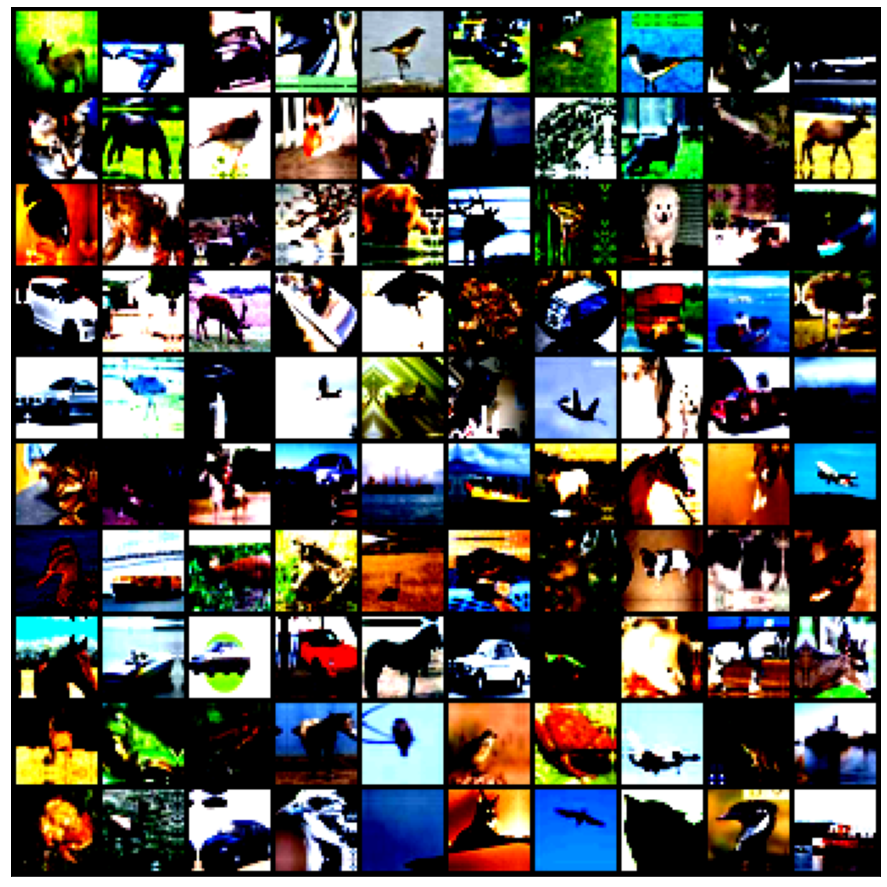

In [ ]:
show_batch(train_dl)

*RNN Model*

In [ ]:
class simpleRNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels= 3, out_channels= 3, kernel_size = 3, stride = 1, padding = 1)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels= 3, out_channels= 3, kernel_size = 3, stride = 1, padding = 1)
    self.relu2 = nn.ReLU()

  def forward(self, x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.conv2(out)
    return self.relu2(out + x)
    # here we have added the original input which retain number of channels
    # We can also concatinate out with original input which will increase the channels
    # We use 1x1 conv layer to change number of channels

In [ ]:
srnn = simpleRNN()
for images, labels in train_dl:
  out = srnn(images)
  print(out.shape)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 3, 32, 32])


![resnet-9](https://github.com/lambdal/cifar10-fast/raw/master/net.svg?sanitize=true)
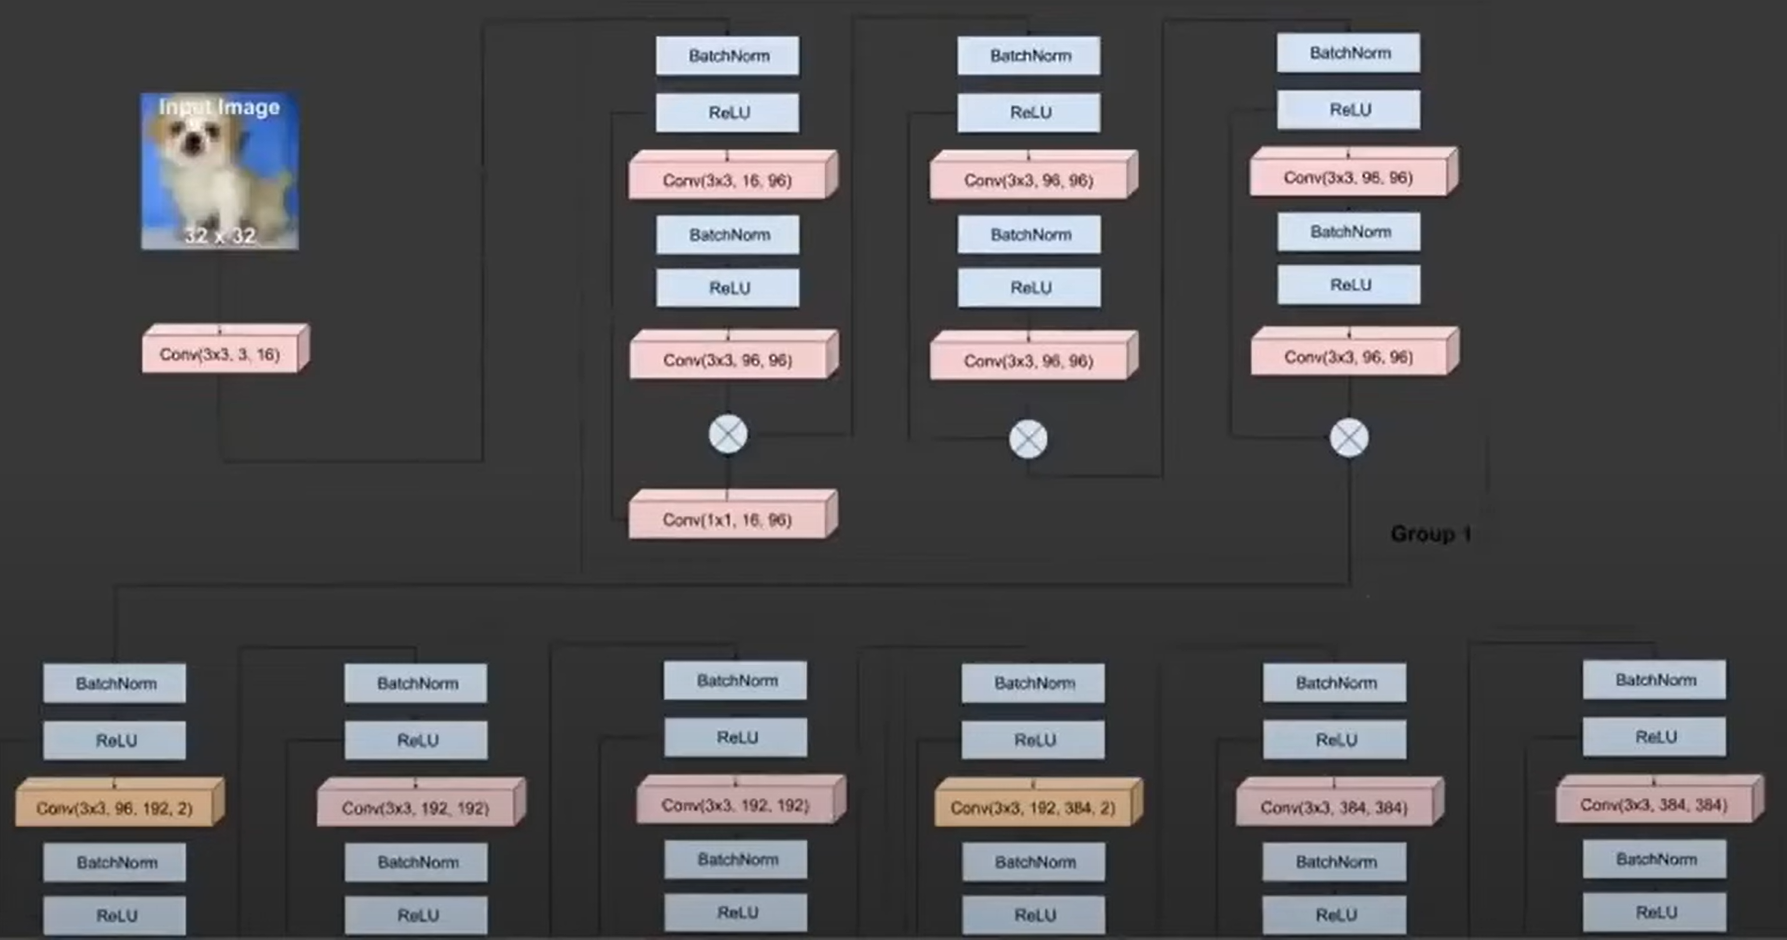

In [ ]:
def conv_2d(ni, nf, stride = 1, ks = 3):
  return nn.Conv2d(in_channels = ni, out_channels = nf,
                   kernel_size = ks, stride = stride,
                   padding = ks//2, bias = False)
  
def bn_relu_conv(ni, nf):
  return nn.Sequential(nn.BatchNorm2d(ni),
                       nn.ReLU(inplace = True),
                       conv_2d(ni, nf))
  
class ResidualBlock(nn.Module):
  def __init__(self, ni, nf, stride = 1):
    super().__init__()
    self.bn = nn.BatchNorm2d(ni)
    self.conv1 = conv_2d(ni, nf, stride)
    self.conv2 = bn_relu_conv(nf, nf)
    self.shortcut = lambda x: x
    if ni != nf:
      self.shortcut = conv_2d(ni, nf, stride, 1)

  def forward(self, x):
      x = F.relu(self.bn(x), inplace = True)
      r = self.shortcut(x)
      x = self.conv1(x)
      x = self.conv2(x) * 0.2
      return x.add_(r)

In [ ]:
def make_group(N, ni, nf, stride):
  start = ResidualBlock(ni, nf, stride)
  rest = [ResidualBlock(nf, nf) for j in range(1, N)]
  return [start] + rest

class Flatten(nn.Module):
  def __init__(self):
    super().__init__()
  def forward(self, x):
    return x.view(x.size(0), -1)

class WideResNet(nn.Module):
  def __init__(self, n_groups, N, num_classes, k = 1, n_start = 16):
      super().__init__()

      layers = [conv_2d(3, n_start)]
      n_channels = [n_start]

      for i in range(n_groups):
        n_channels.append(n_start * (2 ** i)*k)
        stride = 2 if i>0 else 1
        layers += make_group(N, n_channels[i],
                            n_channels[i+1], stride)
        
      layers += (nn.BatchNorm2d(n_channels[3]),
                nn.ReLU(inplace = True),
                nn.AdaptiveAvgPool2d(1),
                Flatten(),
                nn.Linear(n_channels[3], num_classes))
      self.features = nn.Sequential(*layers)

  def forward(self, x):
      return self.features(x)

def wrn22():
  return WideResNet(n_groups= 3, N = 3, num_classes = 10, k = 6)


In [ ]:
model = wrn22()

In [ ]:
model

WideResNet(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ResidualBlock(
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(16, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU(inplace=True)
        (2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (shortcut): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (2): ResidualBlock(
      (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [ ]:
for images, labels in train_dl:
  print(images.shape)
  out = model(images)
  print(out.shape)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 3, 32, 32])
torch.Size([256, 10])


In [ ]:
from fastai.basic_data import DataBunch
from fastai.train import Learner
from fastai.metrics import accuracy

In [ ]:
data = DataBunch.create(dataset_train, dataset_test, bs = batch_size, path = "/content/cifar10")
# Does all steps to prepare data for training and loading to available device
learner = Learner(data, model, loss_func = F.cross_entropy, metrics = [accuracy])
#learner is encapsulation of data and model 
learner.clip = 0.1
#bounds gradients in range [-0.1, 0.1]

In [ ]:
learner.lr_find()

In [ ]:
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(9, 5e-3, wd = 1e-4)
#wd: weight decay

# GAN

In [ ]:
import torch
import torchvision
from torchvision.transforms import transforms, ToTensor, Normalize, Compose
from torchvision.datasets import MNIST
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_dataset = MNIST(root = '/content/', 
                      train = True,
                      download = True,
                      transform = Compose([ToTensor(), Normalize(mean = (0.5,), std = (0.5,))]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
img, label = train_dataset[0]
img.min(), img.max()

(tensor(-1.), tensor(1.))

In [ ]:
def denorm(x):
  out = (x + 1)/2 
  return out.clamp(0, 1)

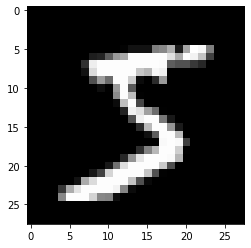

In [ ]:
img_norm = denorm(img)
plt.imshow(img_norm[0], cmap = 'gray')


In [ ]:
from torch.utils.data import DataLoader

batch_size = 100
data_loader = DataLoader(train_dataset, batch_size, shuffle = True)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
img_size = 784
hidden_size = 256

In [ ]:
import torch.nn as nn
D = nn.Sequential(
    nn.Linear(img_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()
)
D.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
latent_size = 64

G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, img_size),
    nn.Tanh()
)

G.to(device)

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=784, bias=True)
  (5): Tanh()
)

In [ ]:
def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  else:
    return data.to(device, non_blocking = True)

class DeviceDataLoader():
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)
  def __len__(self):
    return len(self.dl)

In [ ]:
x = torch.rand(2, latent_size)
x = to_device(x, device)

y = G(x)
gen_imgs = denorm(y.reshape(-1,28,28).detach())

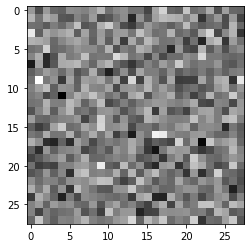

In [ ]:
plt.imshow(gen_imgs[1].cpu(), cmap = 'gray')

In [ ]:
criterion = nn.BCELoss()
d_optim = torch.optim.Adam(D.parameters(), lr = 0.0002)
g_optim = torch.optim.Adam(G.parameters(), lr = 0.0002)

In [ ]:
def reset_grad():
  d_optim.zero_grad()
  g_optim.zero_grad()

def train_discriminator(images):
   real_labels = torch.ones(batch_size, 1).to(device)
   fake_labels = torch.zeros(batch_size, 1).to(device)

   outputs = D(images)
   d_loss_real = criterion(outputs, real_labels)
   